Assignment 1

Dibuat Oleh : Fajri Sofianto
Tanggal : 17 Agustus 2023

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [101]:
df = pd.read_csv('D:\File_Analisa_Python\london_crime.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


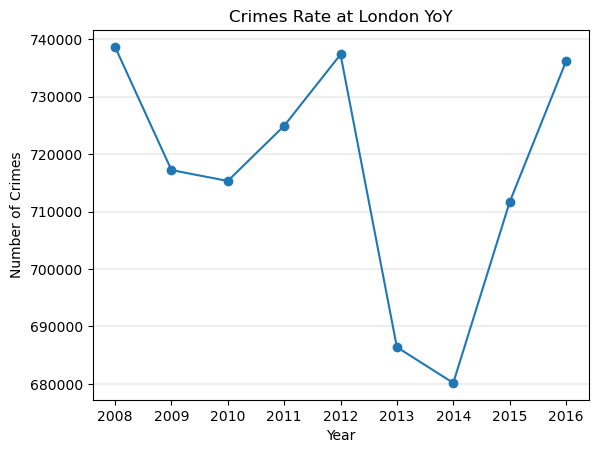

For 2012 to 2014, London Crime rate has dropped significantly about 5.000 case But in 2014 to 2016, number of crimes in London back to level 73.000 this trend is robberies and assaulted committed by individuals riding mopeds,
Crime involving mopeds roses by more than 600% in London between 2014 - 2016 source : https://en.wikipedia.org/wiki/Crime_in_London


In [163]:
df_yearly = df[['year', 'value']]

df_yearly.groupby('year').sum('value').plot(marker = 'o',
                                            legend=False)
plt.ylabel('Number of Crimes')
plt.title('Crimes Rate at London YoY')
plt.xlabel('Year')
plt.grid(axis='y',
         linewidth =0.3)
plt.show()
print('For 2012 to 2014, London Crime rate has dropped significantly about 5.000 case '\
      'But in 2014 to 2016, number of crimes in London back to level 73.000 this '\
      'trend is robberies and assaulted committed '\
      'by individuals riding mopeds,')
print('Crime involving mopeds roses by more than 600% in London between 2014 - 2016 '\
      'source : https://en.wikipedia.org/wiki/Crime_in_London')

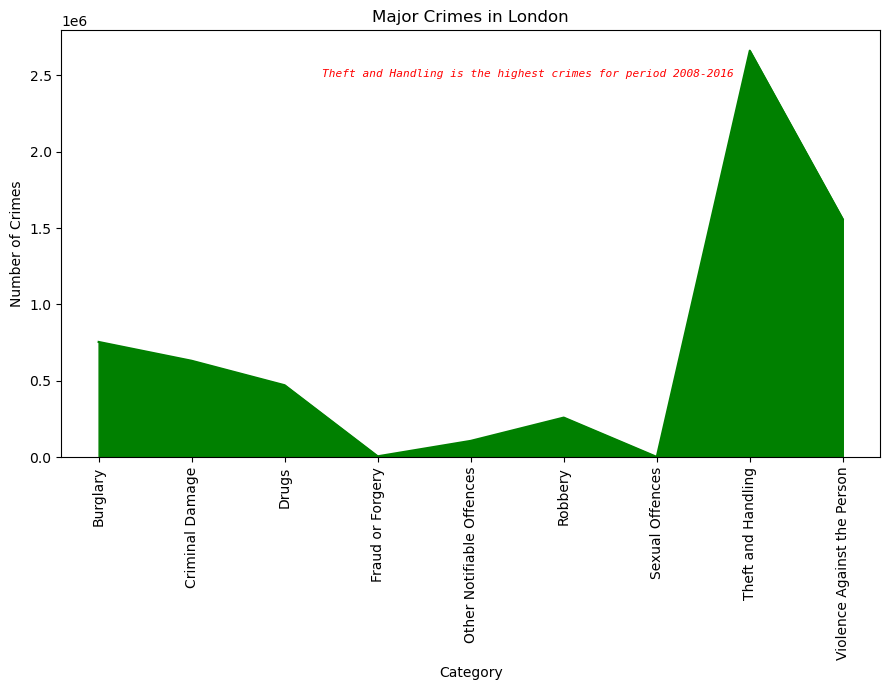

Theft and Handling is the highest crime major categories for about 2,6 million case in 8 years


,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765
Robbery,258873
Other Notifiable Offences,106349
Fraud or Forgery,5325
Sexual Offences,1273


In [160]:
df_major_category = df[['major_category', 'value']]

df_major_category = df_major_category.groupby('major_category').sum('value')

df_major_category.plot(kind='area',
                                                            legend=False,
                                                            color='green',
                                                            figsize=(9,7)
                                                            )
plt.ylabel('Number of Crimes')
plt.xlabel('Category')
plt.title('Major Crimes in London')
plt.xticks(rotation=90)
plt.text(2.4,2490000,'Theft and Handling is the highest crimes for period 2008-2016',
         fontsize=8,
         family='monospace',
         style='italic',
         color='red')
plt.tight_layout()
plt.show()

print('Theft and Handling is the highest crime major categories for about 2,6 million case in 8 years')

df_major_category.sort_values(by= 'value', ascending=False)

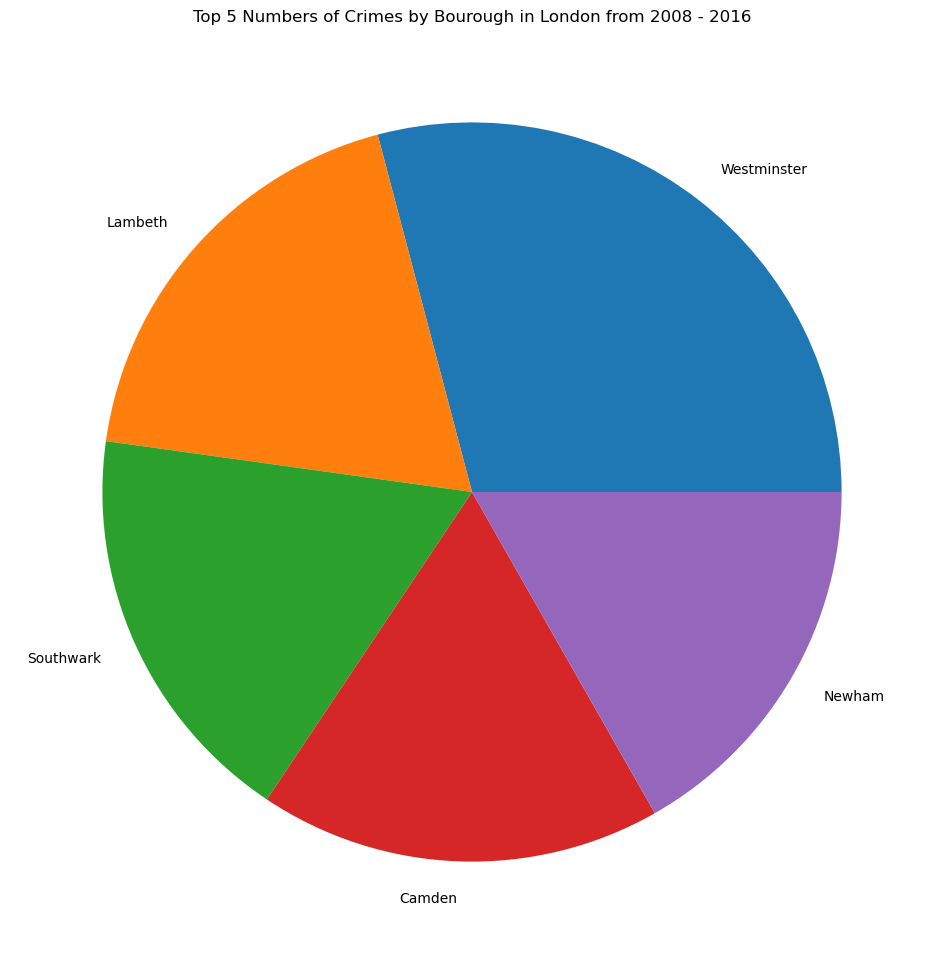

Westminster become most highest crime rate in London due to one of the highest population and parts of Westminster are in the centre of the city. there are 1.580 crimes per square kilometer
source:https://www.rentlondonflat.com/the-safest-and-most-dangerous-places-to-rent-in-london/#:~:text=Park%20and%20Barnsbury.-,1.,crimes%20reported%20per%20square%20kilometer.


,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024


In [165]:
df_borough = df[['borough','value']]

df_borough = df_borough.groupby('borough').sum('value')

pie = df_borough.sort_values(by=('value'), ascending=False).head(5)

pie.plot.pie(y='value', figsize=(12,12), legend=False)
plt.ylabel('')
plt.title('Top 5 Numbers of Crimes by Bourough in London from 2008 - 2016')
plt.show()

print('Westminster become most highest crime rate in London due to one of the highest population '\
      'and parts of Westminster are in the centre of the city. there are 1.580 crimes per square kilometer')
print('source:https://www.rentlondonflat.com/the-safest-and-most-dangerous-places-to-rent-in-london/#:~:text=Park%20and%20Barnsbury.-,1.,crimes%20reported%20per%20square%20kilometer.')
pie

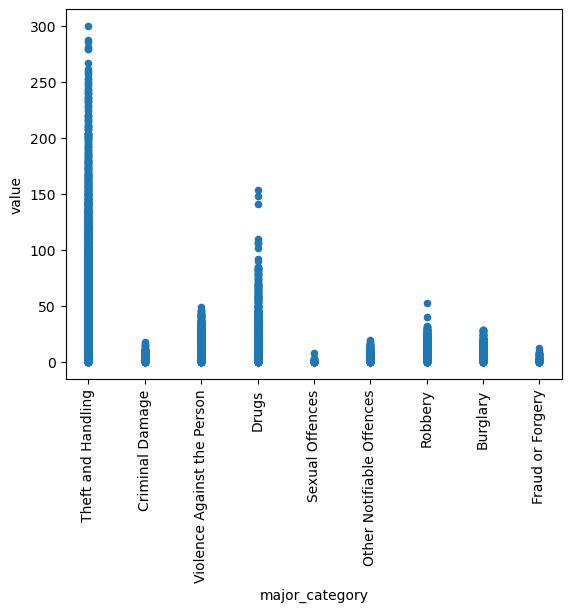

In [152]:
df_borough_scat = df[['borough','major_category','value']]

df_westminster = df_borough_scat[df_borough_scat["borough"] == "Westminster"]


df_westminster.plot(kind='scatter',x='major_category', y='value', rot=90)
plt.show()
#df_borough_scat.plot(kind='scatter',x='major_category', y='borough')
#df_borough_scat.sort_values(by=('value'), ascending=False).head(15)

,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765
Robbery,258873
Other Notifiable Offences,106349
Fraud or Forgery,5325
Sexual Offences,1273
